In [1]:
using DataFrames
using Plots
using CSV
using StatPlots
using Statistics

┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1189


In [92]:
newFixedThreadPool = CSV.read("newFixedThreadPool.csv")
newCachedThreadPool = CSV.read("newCachedThreadPool.csv")
newWorkStealingPool = CSV.read("newWorkStealingPool.csv")
print()

In [93]:
newFixedThreadPool = by(newFixedThreadPool, [1,2]) do dff
    DataFrame(time_mean = mean(dff[3]), time_std = std(dff[3]))
end

newCachedThreadPool = by(newCachedThreadPool, [1,2]) do dff
    DataFrame(thread_mean = mean(dff[3]), thread_std = std(dff[3]), time_mean = mean(dff[4]), time_std = std(dff[4]))
end
newCachedThreadPool[:thread_mean] = map(x -> trunc(Int64, x), newCachedThreadPool[:thread_mean])

newWorkStealingPool = by(newWorkStealingPool, [1,2]) do dff
    DataFrame(time_mean = mean(dff[3]), time_std = std(dff[3]))
end
print()

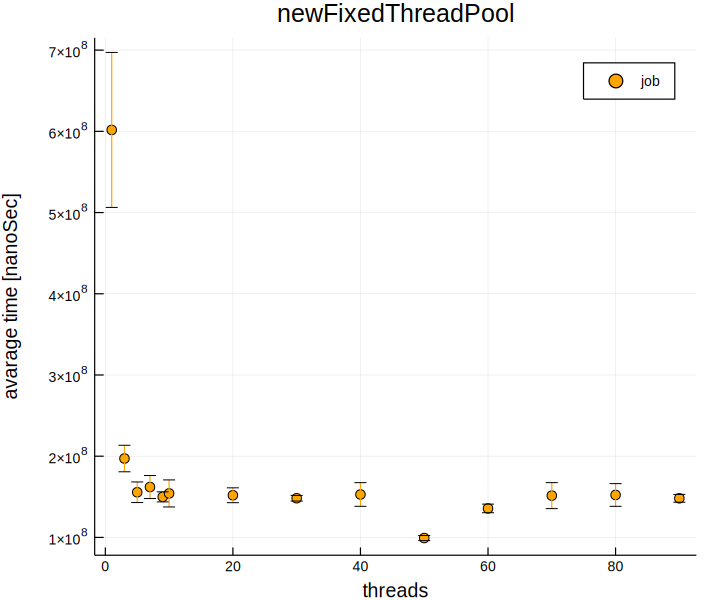

In [112]:
scatter(newFixedThreadPool[2], newFixedThreadPool[3], 
        color = [:orange], 
        yerr = newFixedThreadPool[4], 
        label = "job",
        dpi = 120, 
        size = (600, 500),
        xlabel = "threads",
        ylabel = "avarage time [nanoSec]",
        title = "newFixedThreadPool")

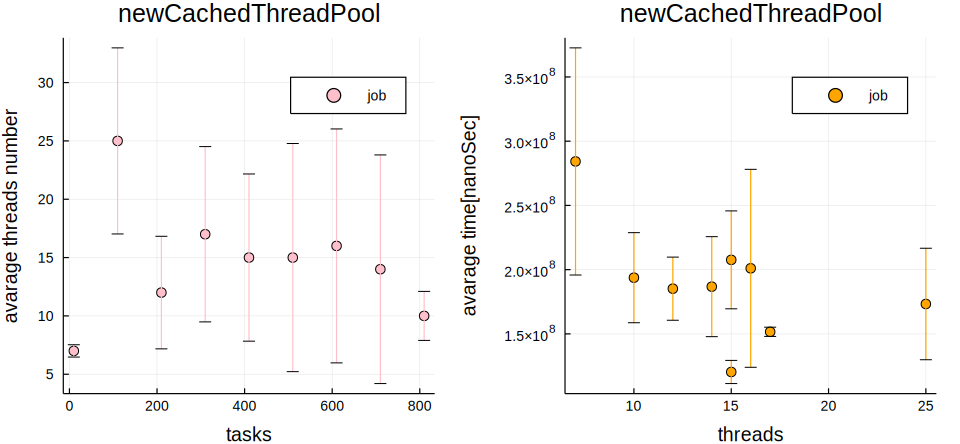

In [111]:
scatter([newCachedThreadPool[2] newCachedThreadPool[3]], [newCachedThreadPool[3] newCachedThreadPool[5]],
        layout = 2,
        color = [:pink :orange], 
        yerr = [newCachedThreadPool[4] newCachedThreadPool[6]], 
        label = "job",
        dpi = 120, 
        size = (800, 370),
        xlabel = ["tasks" "threads"],
        ylabel = ["avarage threads number" "avarage time[nanoSec]"],
        title = "newCachedThreadPool")

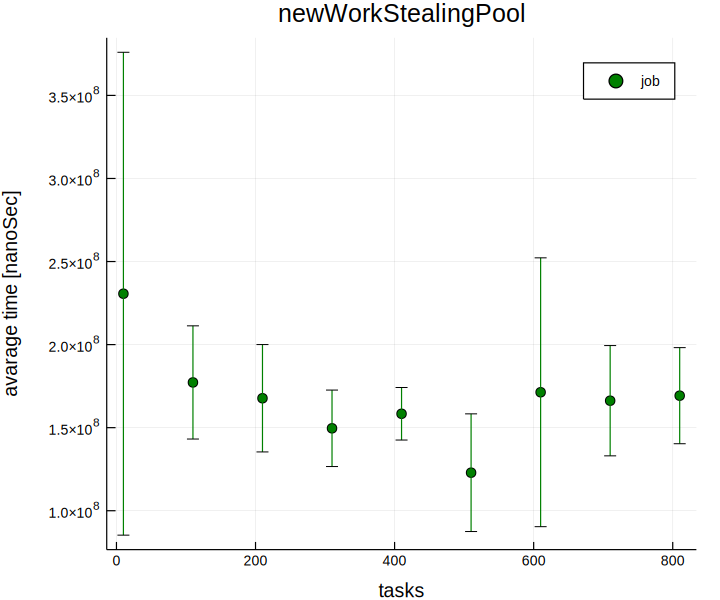

In [110]:
scatter(newWorkStealingPool[2], newWorkStealingPool[3], 
        color = [:green], 
        yerr = newWorkStealingPool[4], 
        dpi = 120, 
        label = "job",
        size = (600, 500),
        xlabel = "tasks",
        ylabel = "avarage time [nanoSec]",
        title = "newWorkStealingPool")